In [1]:
from __future__ import print_function, division
import numpy as np
import sympy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Computational Mathematics I, Project 2

# Author: Foivos Lampadaridis Kokkinakis

## Objective : Applying LU Decomposition for matrix inversion and the Power Method for finding the largest eigenvalue and eigenvector of a symmetric, invertible 5 × 5 matrix. Use the following matrix for your analysis:

$$A=\begin{bmatrix} 4 & 1 &2 &3 &5 \\ 1 & 3 & 1 & 4 & 2 \\ 2 & 1 & 5 & 2 & 3 \\ 3 & 4 &2 &4 &1 \\ 5 & 2 &3 &1 &5\end{bmatrix}$$

## Task 1: LU Decomposition and matrix inversion

### Theory

Matrices have many applications to mathematics and physics alike. Let's assume we heve the $(n \times n)$ matrix $A$. One of the most commonly used calculations conserning a matrix $A$ is finding it's inverse $A^{-1}$. __We say that $A^{-1}$ is the inverse of $A$ only if__:

$$\boxed{A A^{-1}= A^{-1} A=I_{nxn}}$$
where $I_{nxn}$ is the nxn identity matrix which has diagonal elements are equal to 1 while all its other elements are 0.


Unlike scalars (apart from zero) matrices aren't always invertable so we have to be careful. __Before attempting to calculate $A^{-1}$ we first must make sure that it exists, which means that for A it must be true that__:
$$\boxed{det(A)\neq 0}$$

After calculating $det(A)$ the most common way to compute $A^{-1}$ is by applying the formula: $A^{-1}= \frac{1}{det(A)} Adj(A)$, where $Adj(A)$ is a matrix made of $n$ determinants of $(n-1) \times (n-1)$ dimensions that need to be calculated. From the definition of the determinant it's clear that one would have to make a very large number of computations to calculate one determinant, since a $(n \times n)$ determinant is made from $n$ ,$(n-1) \times (n-1)$ determinants, especially if n is large. To be more specific, the order of computations one has to make to compute a $(n \times n)$ dereminant is $O(n!)!$ __cite__. This makes the application of the formula swown above, very time consuming and cumputationally costly,which in return makes it clear that we must approach the calculation of $A^{-1}$ differently.

From matrix multiplication we know that if two matrices $A$ and $B$ are multiplied and they result is a matrix $C$, the $i$th line of the A matrix and the $j$th column of the B matrix are going to be used to calculate the $c_{i,j}$ element of the $C$ matrix. __Let's assume we are trying to solve a system of $n$ linear equations $A \times x = b$__ where $A$ is the coefficient matrix with dinmensins $(n \times n)$, $x$ is the column  matrix of the variables with dinmensins $(n \times 1)$ and b is the is the column matrix of the constants with dinmensins $(n \times 1)$. __Now let's assume that the mth element of $b$, $b_m$ is its only non-zero element and it's equal to one__.

__If we take into acount that the result of mutiptipling $A$ with its inverse matrix $A^{-1}$ we get the identi matrix $I_{nxn}$ and how matrix multiplication works as explained earlier, we can clearly see that if the only non zero element of b is $b_m$ then the solution of our system must be such that the matrix $x$ contains exactly the elements of the mth column of $A^{-1}$. This means that a calculation of the inverse matrix of a $(n \times n)$ matrix $A$ is reduced to the calculation of the solution of $n$ number of linnear systems each containing $n$ linear equations.__ By solving each one of these $n$ linnear systems we will calculate one column of $A^{-1}$. __The only differce between these $n$ linnear systems of equations, is going to be the the matrix $b$, since the position of $b_m$ determins the columb of $A^{-1}$ that's been calculated.__

Let's assume that we're trying to solve the linnear system:

$$A \times x=b$$


__The most commonly used method of solving a number of systems where their only difference is the matrix of constants $b$, is L-U dicomposition.__ L-U dicomposition referst to the process of solving a linner system of equations by __fistly calculating the elements of a lower dioginal matrix $L$ and an upper diagonal matrix $U$, such as: $$\boxed{L \times U =A}$$ After that the Matrices $L$ and $U$ are used to solve the system__. One can assume different thing about the maxtrices $L$ and $U$ which will influence the formulas we'd have to use. __Here we chose to work with Crout decomposition, which assumes that the diagonal elemets of $U$ are equal to one.(cite_eng)__

__Step 1: Dicomposition)__ To explain how we can calculate the elements of $L$ and $U$ let's assume that $A$ is a $(3 \times 3)$ matrix. Then:: $A=L\times U \Rightarrow A=\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix}=\begin{bmatrix} l_{11} & 0 & 0 \\ l_{21} & l_{22} & 0 \\ l_{31} & l_{32} & l_{33} \end{bmatrix}*\begin{bmatrix} 1 & u_{12} & u_{13} \\ 0 & 1 & u_{23} \\ 0 & 0 & 1 \end{bmatrix}$ Multiplying the elements  $L$'s rows with the first column of  $U$ we get: $l_{11}=a_{11} \ l_{21}=a_{21} \ l_{31}=a_{31}$. Knowing the first column of $L$, we multiply its elements with those of the 2nd and 3rd culumb of  $U$ we get: $l_{11}u_{12}=a_{12} \Rightarrow u_{12}=\dfrac{a_{12}}{l_{11}}$ και $l_{11}u_{13}=a_{13} \Rightarrow u_{13}=\dfrac{a_{13}}{l_{11}}$. We now know the first column of $U$. Using each elemants one would then calculate the elements of the 2nd row of $L$ and then the elemaents of the 2nd column of $U$ and so on. This process is repeated unil all elements of $L$ and $U$ are calculated. Luckily for us there are general formulas for the calculation of these elements which makes the L-U decomposition quite easy to program. __If $A$ is a $(n \times n)$ matrix the elements of $L$ and $U$ are (cite_eng):__

$$\boxed{l_{ij}=a_{ij}-\sum_{k=1}^{j-1} l_{ik}u_{kj} \text{ for } j \leq i \text{ and } i=1,2, \ldots,n} \boxed{u_{ji}=\dfrac{a_{ji}-\sum_{k=1}^{j-1}l_{jk}u_{ki}}{l_{jj}} \text{ for } j \leq i \text{ and } j=2,3, \ldots,n}$$

__where in thet special cace that $j=1$ we have that (cite_eng) $\boxed{l_{i1}=a_{i1}}$ and when $i=1$ we have that $\boxed{l_{1j}=\dfrac{a_{i1}}{l_{11}}}$.
What's important is that once $L$ and $U$ have been calculated, if we want to find $A^{-1}$ we don't have to repeated this step again.__

__Step 2: Solving the System)__ Now that we have calculated $L$ and $U$, we can write our sustem of linnear equations as: $$\boxed{L\times U \times x=b}$$ If we name $U \times x=b'$ we have that:

$$L \times b'=b$$

which is a linnear system of equations where the matrix of coefficants is now $L$ and the variable metrix is $b'$. __Since $L$ is a low diagonal matrix in reality this system is already solved meaning we cand directly calculate the elements of $b'$ using the front substitution algorithm__. This algorithm is called front substutution since when we apply it, the first variable $b'_1$ is calculated first and then $b_2$ and so on. We can show that:

$$ \boxed{b'_1=\dfrac{b_1}{l_{11}} \text{ and } b'_i=\dfrac{b_i-\sum_{k=1}^{i-1}l_{ik}b'_k}{l_{ii}},i=2,3,\ldots,n}$$

Now that we know the elements of the $b'$ matrix we can solve the system of our linner equations $U \times x=b'$. __Since $U$ is a upper diagonal matrix in reality this system is already solved meaning we cand directly calculate the elements of $x$ using the front substitution algorithm__. This algorithm is called backwards substutution since when we apply it, the last variable $x_n$ is calculated first and then $b_{n-1}$ and so on. We can show that:

$$ \boxed{x_n=\dfrac{b'_n}{u_{11}} \text{ and } x_i=\dfrac{b'_i-\sum_{k=i+1}^{n}u_{ik}x_k}{u_{ii}},i=n-1,n-2,\ldots,1}$$


## Methodology

Our application revolves aroun the $(5 \times 5)$ matrix $A=\begin{bmatrix} 4 & 1 &2 &3 &5 \\ 1 & 3 & 1 & 4 & 2 \\ 2 & 1 & 5 & 2 & 3 \\ 3 & 4 &2 &4 &1 \\ 5 & 2 &3 &1 &5\end{bmatrix}$. Let's save matrix A in our program so we can perform calculation with it.

In [2]:
A=np.array([[4, 1, 2, 3, 5,],[1,3,1,4,2],[2,1,5,2,3],[3,4,2,4,1],[5,2,3,1,5]])

__Before iven attemting to calculate the inversse matrix of $A$, we should forst chech if $A$ is invertible. To do so we will use the criterion that was mentioned in the theory section: $det(A)\neq 0$.__ Using a special function, we calculate the determinant of A, and we save the result in a variable named det_A. We then check if $A$ is invertible or not and we print the appropiate messege/

In [3]:
det_A=np.linalg.det(A)

if det_A!=0:
    print("The determinant of your matrix is equal to:", det_A,"and it's inversible!!")
else:
    print("The determinant of your matrix is equal to:", det_A,"and it's not inversible!!")

The determinant of your matrix is equal to: -431.9999999999998 and it's inversible!!


__As we can see $A$ is invertible so we can attempt to calculate it!__ 

__Our first step when using the L-U decomposition method is calculating the lower diagonal matrix $L$ and the upper diagonal matrix $U$, based on our matrix $A$.__ To do so we have created an appropriate function named LU_decomposition. This function will take a square matrix $A$ as an input and it will return:

__1)__ The lower diagonal matrix $L$ using the appropriate formulas stated in the theory section.

__2)__ The upper diagonal matrix $U$ using the appropriate formulas stated in the theory section.

In [4]:
# Our function has as input a square matrix A
def LU_decomposition(A):
    
    n=len(A)#The dimensions of A
    
    L=np.zeros((n,n)) #L is normalized as the 0(nxn) matrix
    
    U=np.eye(n) #U is normalized as the identity matrix of n dimensions since its diagonal elements are equal to 1
    
    
    for i in range(0,n): #i from 0 to n-1 The bigger index. this means that for the L matrix, it's the row index while for U it's the column index.
        
        for j in range(0,i+1): # for j from 0 to i. The smaller index. this means that for the L matrix, it's the column index while for U it's the row index.
            
            #The sums that are used in the formula are normalized
            sumL=0
            sumU=0

            if j==0:#Special case: (The first column of L) 
                L[i][0]=A[i][0] #The formula that gives us the first column of L (it's equal to the first column of A)
            
            
            if i==0: #Special case (first row of U) 
                U[0][j]=A[0][j]/L[0][0] #The formula that gives us the first row of U
             
            
            #The sums used in the formulas are calculated for each value of j (sums up to j-1)
            for k in range(j):
                sumL=sumL+L[i][k]*U[k][j]
                sumU=sumU+L[j][k]*U[k][i]
 
            #The formulas that give us the elements of L and U when we're not in a special case
            L[i][j]=A[i][j]-sumL
            U[j][i]=(A[j][i]-sumU)/L[j][j]
            
            
    return L, U #We return
    #1) The Matrix L
    #2) The Matrix U

Since we have our function we will use it in our specific problem. Here the matrices we want to calculate $L$ and $U$ out of is $A$. Using L-U decomposition, we must save all its outputs in the proper variables:

__1)__ The lower diagonal matrix $L$ is saved in the variable name L_A.

__2)__ The upper diagonal matrix $U$ is saved in the variable name U_A.

In [5]:
L_A ,U_A =LU_decomposition(A)

Now that we have calculated the matrices L_A and U_A we don't have to do that again!

__We've created a function named LU_Inverse that takes as input the two diagonal matrices named $L$ and $U$ coming from the L-U decomposition of $A$ and tries to calculate $A^{-1}$__.  Its first step is to normalize the inverse of A as a matrix that's the same dimension as $L$ and $U$ filled with zeros. Then it tries to calculate  $A^{-1}$ column by column. 

Let's assume the ith column of $A^{-1}$ is being calculated. Its first step is to set the ith element of the matrix of constants $b_i=1$ while it sets all its other elements $b_{\neq i}=0$. This way, the calculation of $A^{-1}$'s' ith column is reduced to solving this system: $L \times U \times x=b$.

Our next step is to calculate the $b'$ matrix using the element of matrix $L$ and the forward substitution formulas that are mentioned in the theory section. Finally knowing $b'$, using the elements of matrix $U$ and the backward substitution formulas that are mentioned in the theory section, we can calculate the $x$ matrix, which is saved in the ith column of $A^{-1}$. This process is repeated for all columns of $A^{-1}$.

In [6]:
def LU_Inverse(L,U):
    
    n=len(L)#The dimensions of L and thus A
    
    A_inv=np.zeros((n,n)) #We normalize the inverse of A as the 0(nxn) matrix
   
    for c in range(n): #for every column of the Matrix A (or L or U)
        
        b_prime=np.zeros((n,1))#We normalize the b' matrix as the 0(nx1) matrix
        b=np.zeros((n,1)) #We normalize the b matrix as the 0(nx1) matrix
        
        x=np.zeros((n,1)) #X is normalized as 0(nx1) matrix where X[c] will give us the (c+1)th column of A inverse
        
        b[c]=1 #We set b[c]=1 so we can calculate the (c+1)-th columb of A inverse
        
        #SOLVING L*b'=b (forward substitution)
        for i in range(0,n): # for i from 0 to n-1 (i is an index so, in reality, it's from the 1st to the nth element)
            
            if i==0:#We check if we are working on the 1st element of b' (0 index) 
                b_prime[i]=b[0]/L[0][0]# we calculate b'[i] using the appropriate forwards substitution formula
            
            #if we are working on the other elements of b' we calculate b'[i] using the forward substitution
            else:
                sum_b_prime=0 #We normalize the sum used in the calculation of b'[i] as 0

                #for k from 0 to i-1 (k is the limits of the sum used in the forward substitution formula)
                for k in range(i):
                    sum_b_prime=sum_b_prime+L[i][k]*b_prime[k] #We calculate the sum we need for the calculation of b'[i]
                
                b_prime[i]=(b[i]-sum_b_prime)/L[i][i] # we calculate b'[i] using the appropriate forwards substitution formula
            
        
        #SOLVING U*X=b' (backward substitution)
        for j in range(n-1,-1,-1): #for j from n-1 to 0 (j is an index so, in reality, it's from the nth  to the 1st element) / (using j we will calculate x[j])
                
           
            if j==n-1: #if we are working on the nth element of x ((n-1)th element of the list) we calculate it using the right formula
                x[j]=b_prime[n-1]/U[n-1][n-1]
            
            else:#if we are working on the other elements of x we calculate x[j] using the backward substitution formula.
                
                sum_x=0 #We normalize the sum used in the calculation of x[j] as 0
                
                for k in range(j+1,n): #for k from 0 to i-1 (k is the limits of the sum used in the formulas)
                    sum_x=sum_x+U[j][k]*x[k] #We calculate the sum we need for the calculation of x[j]
                    
                  
                x[j]=(b_prime[j]-sum_x)/(U[j][j]) # We apply the backwards substitution formula to calculate the element x[j] 
                
                    
        A_inv[:, c] = x.flatten() # We save the elements of x in the cth column of A inverse   
            
            
    return A_inv #We return the inverse matrix of A

Since we have our function we will use it in our specific problem. Here the matrix we want to calculate $A^{-1}$.Using L_A and U_A that we got from L-U decomposition, we call our function. We must save all its outputs in the proper variables:

__1)__ The inverse of matrix $A$ is saved in a variable named A_inv.



In [7]:
A_inv=LU_Inverse(L_A,U_A)

### Results

__In this section we will present the results we got from our application of th L-U decomposition method in calculating the inverse of matrix $A$__.

Firstly we present the two diagonal matrices L_A and U_A that were calculated from our starting matrix $A$.

In [8]:
print("The lower diagonal matrix L calculated from A is: \n",L_A,"\n")
print("The upper diagonal matrix U calculated from A is: \n",U_A)

The lower diagonal matrix L calculated from A is: 
 [[ 4.          0.          0.          0.          0.        ]
 [ 1.          2.75        0.          0.          0.        ]
 [ 2.          0.5         3.90909091  0.          0.        ]
 [ 3.          3.25       -0.09090909 -2.09302326  0.        ]
 [ 5.          0.75        0.36363636 -3.62790698  4.8       ]] 

The upper diagonal matrix U calculated from A is: 
 [[ 1.          0.25        0.5         0.75        1.25      ]
 [ 0.          1.          0.18181818  1.18181818  0.27272727]
 [ 0.          0.          1.         -0.02325581  0.09302326]
 [ 0.          0.          0.          1.          1.73333333]
 [ 0.          0.          0.          0.          1.        ]]


Lastly we present the result from our application of th L-U decomposition method in calculating the inverse of matrix $A$.

In [9]:
print("The inverse matrix of A is: \n", A_inv)

The inverse matrix of A is: 
 [[ 0.24537037 -0.45833333 -0.10185185  0.34259259 -0.06944444]
 [-0.45833333  0.375      -0.08333333 -0.08333333  0.375     ]
 [-0.10185185 -0.08333333  0.25925926  0.03703704 -0.02777778]
 [ 0.34259259 -0.08333333  0.03703704  0.14814815 -0.36111111]
 [-0.06944444  0.375      -0.02777778 -0.36111111  0.20833333]]


 ### Analysis/Discussion
 
 In this section we will check the validity of our results and commend on them. Let's begin with testing the validity of our L-U decomposition step. Theoretically we know that if we multiply the two matrices we calculated, L_A with U_A, we should get our initial matrix $A$.

In [10]:
print("The result of multiplying L with U is: \n",np.dot(L_A,U_A),"\n\nA=\n",A)

The result of multiplying L with U is: 
 [[4. 1. 2. 3. 5.]
 [1. 3. 1. 4. 2.]
 [2. 1. 5. 2. 3.]
 [3. 4. 2. 4. 1.]
 [5. 2. 3. 1. 5.]] 

A=
 [[4 1 2 3 5]
 [1 3 1 4 2]
 [2 1 5 2 3]
 [3 4 2 4 1]
 [5 2 3 1 5]]


What this result tells us is that up to the L-U decomposition step, our calculations have been correct and worked as expected.

The final step we must take is to check if the matrix we endend up with is actully $A^{-1}$. As stated in the theory section the product of $A$ with its' inverse should give us the 5 by 5 identity matrix $I_{5 \times 5}$. To check if this is true we will calculte $A$ with the matrix we ended up with (A_inv):

In [11]:
with np.printoptions(precision=4):
    print("The product of A with A_inv is:\n\n",np.dot(A,A_inv))

The product of A with A_inv is:

 [[ 1.0000e+00  1.1102e-16  1.0408e-17  2.2204e-16  8.3267e-17]
 [-5.5511e-17  1.0000e+00 -6.9389e-18  0.0000e+00 -5.5511e-17]
 [-8.3267e-17  1.1102e-16  1.0000e+00  0.0000e+00  1.3878e-16]
 [ 3.0531e-16  1.1102e-16  1.0755e-16  1.0000e+00 -2.4980e-16]
 [ 8.3267e-17  5.5511e-16 -1.0061e-16  0.0000e+00  1.0000e+00]]


The result we get is indeed not equal to the identity matrix, since some of it's non diagonial elements are close but not equal to zero. __This was expected as the number of calculations our computer has to perform increases, the accuracy of our final result decreases. This is due to the round off error and we can't do anything about it, other than finding another method of calculating $A^{-1}$ which would require less calculations. This means that our algorythm worked as expected and that the L-U decomposition can indeed be used for calculating the inverse of a matrix $A$.__

### Conclusion

In conclution it's clear that that L-U decomposition method is really important when trying to compute the inverse of a matrix $A$. The biggest strength of this method is that a big part of the calculation (computing $L$ and $U$) has to be done one time. After that we are able to use the lower and upper diagonal metrices $L$ and $U$ to compute each column of $A$ cepertly just by altering the constant matrix $b$. This makes the computation of $A^{-1}$ a lot quicker than some more well known methods like the Gauss elimination method.

---------------

## Task 2: The power method and the computation of the biggest eigenvalue of a matrix

### Theory

Another important calculation one may be required to do when working with matrices is to compute its' eigenvalues and the corresponding eigenvectors. In this project we will just focus on the computation of the largest eigenvalue of a given matrix, using the power method.

The definition of an eigenvector and eigenvalue is given by the following:If $A$ is a n by n matrij we say that $y^{(i)}$ and $\lambda_i$ is its eigenvector and eigenvalue if and only if:

$$\boxed{A \times y^{(i)}=\lambda_i \times y^{(i)}}$$

Classically the computation of the eigenvalues of a n by n matrix $A$ is given by it's characteristical polynomyal $$det(A-\lambda*I_{n \times n})=0$$

As we can clearly see, the above requires the computation of an n by n determinant which is very computationally costly since its' compacity is $O(n!)$ __cite__! This makes it clear the eigenvalues of a matrix should be calculated in a different way. Let's assume that the matrix we are working on is $A$ and since it is a n by n matrix, its characteristic polynomial could theoticly be an n-th degree polynomial, meaning it could have n different eigenvalues $\lambda_i$. If we sort $A$'s from larges to smalest we get: $$|\lambda_1|>|\lambda_2|>\ldots>|\lambda_n|$$

An important note to make here is that the eigenvectors of a n by n matrix $A$, create a n-dimensin orthocanonical system. This means that every other n-dimension vector, can be written as a linnear combination of $A$'s eigenvectors. In other words we can write any vector $x$ as:
$$x=a_1y^{(1)}+a_2y^{(2)}+\ldots+a_ny^{(n)}$$
where $y^{(i)}$ are $A$'s eigenvectors that correspind to the eigenvalue $\lambda_i$. Since every vector can be written as a linnear combination of $A$'s eigenvectors if we take the product of $A$ with a random vector $x$ we will have:$$x^{(1)}=A \times x=A \times \sum_{i=1}^{n}a_i y^{(i)}= \lambda_1a_1y^{(2)}+\lambda_2a_2y^{(i)}\ldots+\lambda_na_ny^{(n)}$$

If we keep mutiplying $x^{(1)}$ by $A$ (let's say $k$ times) we will get: $$x^{(k)}=A \times x^{(k-1)}=\lambda_1^k\left(a_1y^{(1)}+\left(\frac{\lambda_2}{\lambda_1}\right)^k a_2 y^{(2)}+\ldots+\left(\frac{\lambda_n}{\lambda_1}\right)^k a_n y^{(n)}\right) \approx \lambda_1^ka_1y^{(1)}$$

where the the turms with:$\frac{\lambda_i}{\lambda_1}<1 \Rightarrow \left(\frac{\lambda_i}{\lambda_1}\right)^k \approx 1$ approch zero as $k$ increases, since $|\lambda_1|>|\lambda_i|$.

If we devide the elements of $x^{(k)}$ with the elements of $x^{(k-1)}$ we will have: $u=\left(\dfrac{x^{(k)}_1}{x^{(k-1)}_1},\dfrac{x^{(k)}_2}{x^{(k-1)}_2},\ldots,\dfrac{x^{(k)}_n}{x^{(k-1)}_n}\right)=\left( \dfrac{\lambda_1^k a_1y^{(1)}_1}{\lambda_1^{k-1} a_1y^{(1)}_1},\dfrac{\lambda_1^k a_1y^{(1)}_2}{\lambda_1^{k-1} a_1y^{(1)}_2} \right)=\left(\lambda_1,\lambda_1,\ldots,\lambda_1 \right)$. In other word the vector $u$ will be a $n$ long vector ,where each one of its' components is an approxiamation of $A$'s largest eigenvalue, $\lambda_1$

The corresponding eigenvector of $\lambda_1$ will be $x^{(k)}=y^{(1)}$ since when it's mutlyplied by $A$ we will get $Ax^{(k)}=a_1\lambda_1y^{(1)}=b_ay^{(1)}$.


### Methodology

To impliment the power method we chose to create a funtion named power_method that takes as input:

__1)__ The matrix whos eigenvector and eigenvalue we are trying to find named A

__2)__ How many signifificant figures of precission the user demands for the value of the eigenvalue named significant_figures_value

__4)__ How many signifificant figures of precission the user demands for the value of the eigenvector named significant_figures_vector

__3)__ The maximum amound of iteration the user is going to allow, named max_count

To begin the implimentation we first have to make an initial guess $x$ for the eigenvector of A's largest eigenvalue $\lambda_1$. We will always choose the $n$-long unitary vector as our initial guess. Since in our case $A$ is a 5 by 5 matrix $x$, we choose $x_k=(1,1,1,1,1)$. We then multiply $x$ with $A$, and we get x_k_plus_1, which is saved in a list called eig_vec_results __From the theory section we can tell that x_k_plus_1 will be the next best approximation for the eigenvalue we are lokking for__. In each iteration firtsly we normalize the old approximation of the eigenvector then calculate the new one by multyplying the old one with $A$. Then we normalize that and we save it in the proper list. After that we divide the largest element of x_k_plus_1 with the largest element of x_k and we save that on the propper list. That value is going to be our approximation for the eigenvalue for this iteration as explayind from eq. toso. After that the approximation perchantage error  for the eigenvector and eigenvector is calculated and saved in the proper lists. The latter is calculated only from the first element from the eigevector since we assume that every element is going to converge in a similar matter. Finally the eigenvalue and eigenvector we got in this iteration become the old ones and the method is repeated as long as the necessary pressisions aren't met and max amount of steps hasn't been reched.


__In each iteration we calculate the eigenvalue acording to the theory, by deviding the largest coefficant of x_k with the largest coeeficant of x_k_plus_1 to achive bigger precission__. This is temporarly saved in a variable named u_k_plus_1 and the stored in a list called u_results. From the value of u in the previous iteration u_k and the values of u in this iteration u_k_plus_1, __we calculate the approximate perchantage error in the value of u and we store it in the list named ea_results. This value will be later used to check if the neccesary precission was achived using the Scarborough formula.__ Finally the approximation of the eigenvector is normalised by deviding its' elements by the larges one and  the new values of u and x (x__k_plus_1,u__k_plus_1) are taken and they are put in the old ones (x_k and u_k) so the method can be repeated if the precission isn't met or the max amount of steps hasn't been reched.

In the end our function returns:

__1)__ The biggest eigenvalue of matrix A with significant_figures number of significant figures of precision

__2)__ The eigenvector that corrispond to the biggest eigen vector

__3)__ a list with the approximate percentage error of the eigenvalue, calculated in each iteration.

__4)__ a list with the calculated eigenvector in each iteration

__5)__ a list with the calculated eigenvalue in each iteration

__6)__ the number of iterations it took.

The funcion power_method is defyined below:

In [12]:
# Our function takes as input:
#1) A: The matrix whose bigger eigenvalue and the corresponding eigenvector the user wants to find
#2) significant_figures_value: The number of significant figures of precision the user demands the eigenvalue to have. After this precision is reached, the iteration stops.
#3) significant_figures_vector: The number of significant figures of precision the user demands the eigenvector to have. After this precision is reached, the iteration stops.
#4) max_count is the upper limit of iterations that are going to be performed. This is more of a safety measure in case the user makes a mistake, or something goes wrong.
def power_method(A,significant_figures_value,significant_figures_vector,max_count):
     
    ea_value=100 #The normalization of the approximate percentage error of the eigenvalue so the method can begin.
    ea_vector=100 #The normalization of the approximate percentage error of the eigenvector so the method can begin.
    
    #The Scarborough Formula. We use it to compute the limit of the percentage approximate error we require to reach the precision that the user asked for for the eigenvalue and vector.
    es_value=0.5*10**(2-significant_figures_value)
    es_vector=0.5*10**(2-significant_figures_vector)

    
    n=len(A) #The dimensions of matrix A
    
    x_k=np.ones((n,1)); #Our initial guess for the eigenvector corresponding to the largest eigenvalue
    eig_vec_results=[] #This is where our approximations of the eigenvector in each iteration will be saved
    
    eig_value_results=[] #This is where the vector u will be saved in each iteration (its elements approximate the largest eigenvalue)
    u_k=1 #The normalization of the vector u_k so the loop can be calculated the first time through (this value doesn’t matter)
    
    ea_results_value=[] # This is where the approximate percentage error of the largest eigenvalue will be saved in each iteration
    ea_results_vector=[] # This is where the approximate percentage error of the corresponding eigenvector will be saved in each iteration
    
    count=0 #The count of the iteration we're on is normalized at 0
    while abs(ea_value)>es_value or abs(ea_vector)>es_vector and count<=max_count:#While the approximate error or the eigenvalue or the approximate error or the eigenvector
        #is lower than what is given by the Scarborough Formula (the necessary precision isn't reached) and while we are under the maximum number of iterations, the method is applied.
    
        count=count+1 #We are in the next iteration
        
        eig_vec_k=(x_k/(np.max(x_k))).flatten() #The old approximation of the eigenvector is normalized and saved
        
        
        x_k_plus_1=np.dot(A,x_k) #The vector x_(k+1)=A*x_k is calculated
        eig_vec_k_plus_1=(x_k_plus_1/(np.max(x_k_plus_1))).flatten() #The eigenvector is calculated by dividing the x_k+1 vector by its larger component (normalization) and saved
        #in the appropriate list
        
        
        
        eig_vec_results.append(eig_vec_k_plus_1) #The vector normalized vector x_(k+1) is saved in the appropiate list
        
        u_k_plus_1=(np.max(x_k_plus_1)/np.max(x_k)) #We calculate the vector u, whose elements give us an estimate for the eigenvalue
        eig_value_results.append(u_k_plus_1) #The vector u is saved in the appropriate list
        
        ea_value=abs((u_k_plus_1-u_k)/(u_k_plus_1))*100 #We calculate the new value of the approximate percentage error of the eigenvalue by dividing the vectors 
        #u_(k+1) and u_k by element
        ea_results_value.append(ea_value) #We save it in the proper list.
        
        ea_vector=abs((eig_vec_k_plus_1[0]-eig_vec_k[0])/eig_vec_k_plus_1[0])*100 #We calculate the new value of the approximate percentage error
        #of the eigenvector from its' first element
        ea_results_vector.append(ea_vector) #We save it in the proper list.
        
    
        
        u_k=u_k_plus_1 ##The best new approximation of the vector u, becomes the old one and the method is repeated
        x_k=x_k_plus_1 #The new vector x_(k+1) becomes the old one and the method is repeated
        
        if count==max_count:#If the max amount of iteration was reached
            print("Warning!!! the maximum number of iterations has been reached! The result isn't as precise as you've asked!") #Print a warning message to the user
            	
    return u_k_plus_1,eig_vec_k_plus_1.flatten(), ea_results_value,ea_results_vector, eig_vec_results,eig_value_results, count #We return
    # 1) The biggest eigenvalue of matrix A with significant_figures number of significant figures of precision
    # 2) The eigenvector that corresponds to the biggest eigenvector.
    # 3) a list with the approximate percentage error of the eigenvalue, calculated in each iteration.
    # 4) a list with the approximate percentage error of the eigenvector, calculated in each iteration.
    # 5) a list with the calculated eigenvector in each iteration
    # 6) a list with the calculated eigenvalue in each iteration
    # 7) The number of iterations it took.

Since we have our function we will use it in our specific problem. Here we want to calculate A's largest eigenvalue and the corresponding eigenvector, we ask for 10 significant figures of precision for both, and we allow for 10000 iterations. We must save all its outputs in the proper variables:

__1)__ The biggest eigenvalue of matrix $A$ with 10 significant figures of precision is saved in max_eigenvalue

__2)__ The eigenvector that corresponds to the biggest eigenvalue is saved in max_eigenvector

__3)__ The list with the approximate percentage error of the eigenvalue, calculated in each iteration is saved in approximate_error_value.

__4)__ The list with the approximate percentage error of the eigenvector, calculated in each iteration is saved in approximate_error_vector.

__5)__ The list with the calculated eigenvector in each iteration is saved in eigenvector_results

__6)__ The list with the calculated eigenvalue in each iteration is saved in eigenvalue_results

__7)__ The number of iterations the power method took to reach the desired precision is saved in num_of_iterations

In [13]:
max_eigenvalue, max_eigenvector, approximate_error_value, approximate_error_vector ,eigenvector_results, eigenvalue_results, num_of_iterations=power_method(A,10,10,10000)

### Results

Here we will present the results we got from the power method. First off we will see the largest eigenvalue and eigen value of $A$.

In [14]:
with np.printoptions(precision=10):
    print("We needed", num_of_iterations, "iterations.",
          "The biggest eigenvalue of A is:", "{:.8f}".format(max_eigenvalue),
          "\nand the eigenvector is:", max_eigenvector.T)


We needed 23 iterations. The biggest eigenvalue of A is: 14.07561378 
and the eigenvector is: [0.9445493184 0.6180313193 0.7787901191 0.7804341894 1.          ]


Now we will create a list, in which we save a natural number up to how many iterations were performed. We will use this list to plot the approximate perchantage error of the eigenvalue and eigenvector. We will also save the expacted value for both in es_exp.

In [15]:
iteration_space_pow=np.linspace(1,num_of_iterations,num_of_iterations)
es_exp=0.5*10**(2-10)

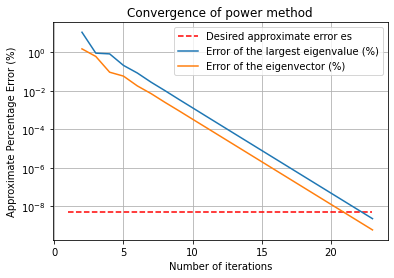

In [16]:
# Power method
fig, ax = plt.subplots()

ax.hlines(y=es_exp,xmin=min(iteration_space_pow),xmax=max(iteration_space_pow),
          color='red',linestyle='--',label='Desired approximate error es') #A line that show the approximate percentage error required for
ax.plot(iteration_space_pow[1:],approximate_error_value[1:],label='Error of the largest eigenvalue (%)') #plotting the curve of the total error (%)
ax.plot(iteration_space_pow[1:], approximate_error_vector[1:],label='Error of the eigenvector (%)') #plotting the curve of the approximate error (%)
#Note: the approximate error makes sense only after two approximations.
ax.set(xlabel='Number of iterations', ylabel='Approximate Percentage Error (%)') #Labels of axis
ax.set_yscale('log') #Log scale
ax.set_title('Convergence of power method') #Title
ax.legend() #show legend
ax.grid()
#plt.savefig("figure.pdf")
plt.show()

Here we will check if max_eigenvalue and max_eigenvector are

In [17]:
print("y^{(1)}=A*y^{(1)}/λ_1=",(np.dot(A,max_eigenvector))/max_eigenvalue,
      "\nwhere y^{(1)}=",max_eigenvector)

y^{(1)}=A*y^{(1)}/λ_1= [0.94454932 0.61803132 0.77879012 0.78043419 1.        ] 
where y^{(1)}= [0.94454932 0.61803132 0.77879012 0.78043419 1.        ]
